In [1]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mercury as mr

import re
from string import punctuation as punct
import warnings
warnings.filterwarnings('ignore')

In [2]:
show_code = mr.Checkbox(label="Show code", value=True)

mercury.Checkbox

In [3]:
app = mr.App(title="Analysis for analysts",description="Data analysis relating to the skills a Data Analyst needs.", show_code=show_code.value)

mercury.App

# Analytical skills 📊
#### Nowadays, it is becoming increasingly difficult to find a first job as a data analyst, so we have prepared an analysis of the most useful skills to help you land your dream job. 

## What you will finde here:

- Salaries for 10 most popular Data Analytics skills
- Number of jobs required
- What company is looking for the most employees
- Where company is looking for the most employees
- Where you can finde the most offert in internet
- What are the working hours
- How many offers have remote work
- Most needed skills

In [4]:
df = pd.read_csv("gsearch_jobs.csv")
df = df.drop(columns=["Unnamed: 0", "index"])

# Format lists
remove_punct = lambda x: x.translate(str.maketrans('', '', punct)).split()
df.extensions = df.extensions.apply(remove_punct)
df.description_tokens = df.description_tokens.apply(remove_punct)

# Format dates
df.date_time = pd.to_datetime(df.date_time)
df.insert(14, "time_ago", df.date_time.apply(lambda x: dt.datetime.today() - x))

In [5]:
#df.info()

In [6]:
skills = []
for val in df.description_tokens.values:
    skills.extend(val)
skills, counts = np.unique(skills, return_counts=True)
top_skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])[:10]
top_skills = list(map(lambda x: x[0], top_skill_count))
top_counts = list(map(lambda x: x[1], top_skill_count))
salaries = []
for skill in top_skills: 
    salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].salary_standardized.mean())
top_skills_df = pd.DataFrame({"skill": list(top_skills), "number_of_postings": top_counts,"avg_salary": map(round, salaries)})
top_skills_df = top_skills_df.sort_values("avg_salary", ascending=False)

#top_skills_df

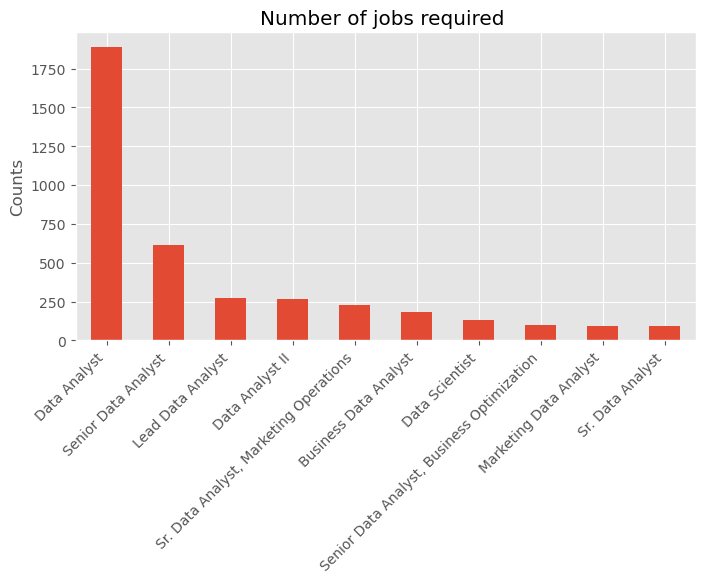

In [30]:
plt.figure(figsize=(8,4))
counts = df['title'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title(f"Number of jobs required ")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Where to look?

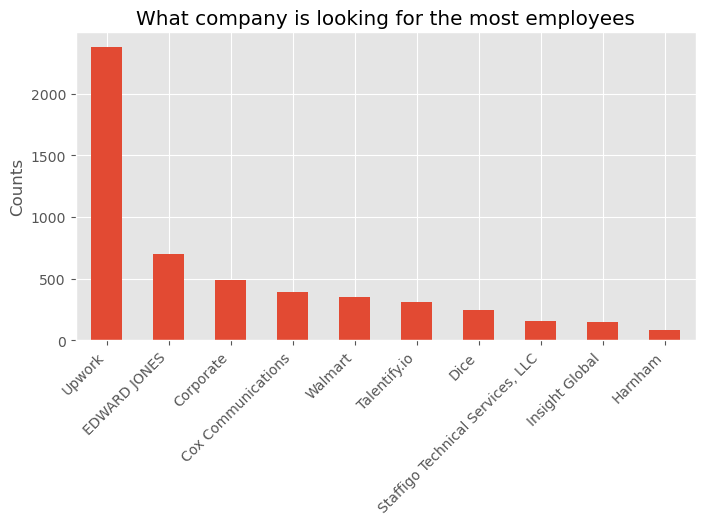

In [9]:
plt.figure(figsize=(8,4))
counts = df['company_name'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title("What company is looking for the most employees")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

In [3]:
#plt.figure(figsize=(8,4))
#counts = df['location'].value_counts().nlargest(10).sort_values(ascending=False)
#counts.plot(kind='bar')
#plt.title("Where company is looking for the most employees")
#plt.ylabel("Counts")
#plt.style.use('ggplot')
#plt.xticks(rotation=45, ha="right")
#plt.show()

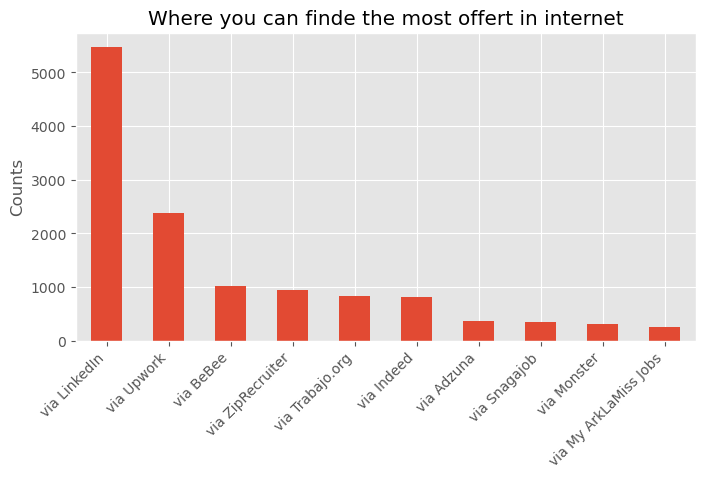

In [11]:
plt.figure(figsize=(8,4))
counts = df['via'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title("Where you can finde the most offert in internet")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Work type

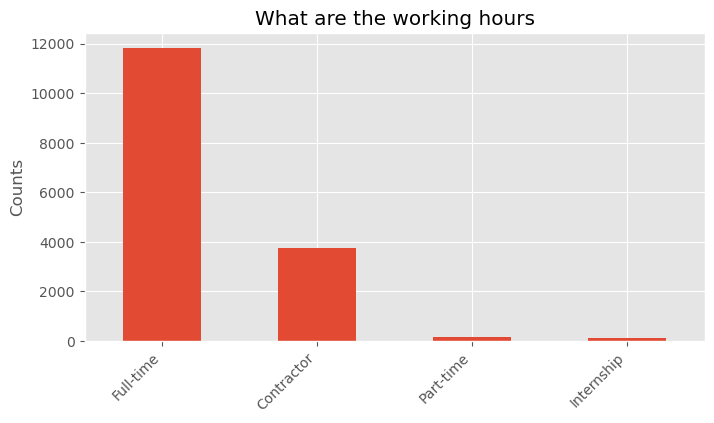

In [12]:
plt.figure(figsize=(8,4))
counts = df['schedule_type'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.style.use('ggplot')
plt.title("What are the working hours")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

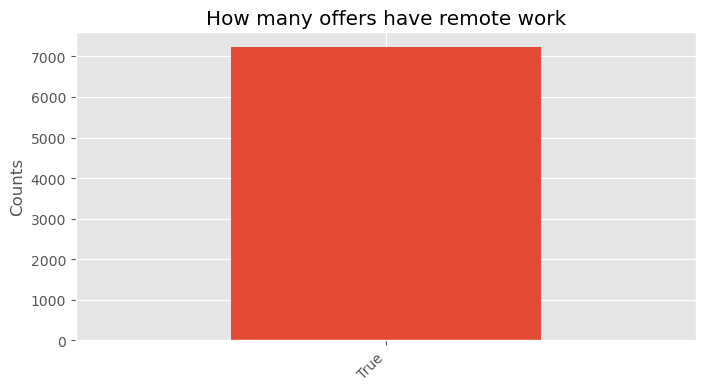

In [13]:
##Change for pie plot and add yes or not

plt.figure(figsize=(8,4))
plt.style.use('ggplot')
counts = df['work_from_home'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')
plt.title("How many offers have remote work")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
#Most valible skill
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_libraries = [
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

In [15]:
keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools

In [16]:
jobs_all = df[df.description.notnull()] # filter out null values
jobs_all = jobs_all.reset_index() # throwing index issues if don't reset index
# jobs_all = jobs_all.head(10)

In [17]:
keyword_counts = {keyword: 0 for keyword in keywords}

for description in jobs_all['description']:
    words = description.lower().split()
    for keyword in keywords:
        if keyword in words:
            keyword_counts[keyword] += 1

In [18]:
#  keyword_counts

In [19]:
# sort keywords by number of occurrences
sorted_counts = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

In [20]:
# extract the 10 most common keywords
top_keywords = sorted_counts[:10]

## Skills & payments

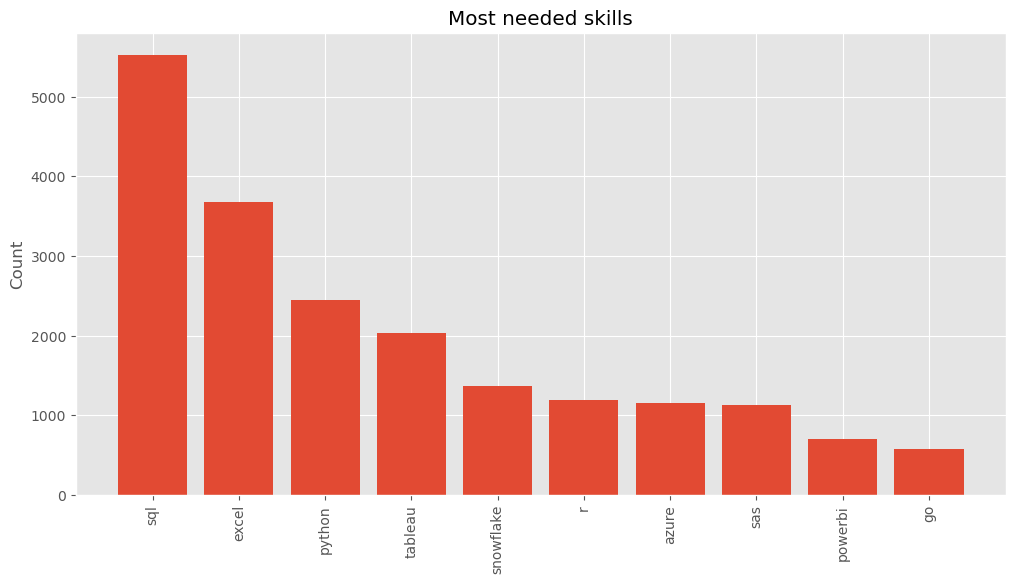

In [21]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
plt.bar(range(len(top_keywords)), [x[1] for x in top_keywords])
plt.xticks(range(len(top_keywords)), [x[0] for x in top_keywords], rotation=90)
plt.title('Most needed skills')
plt.ylabel('Count')
plt.show()

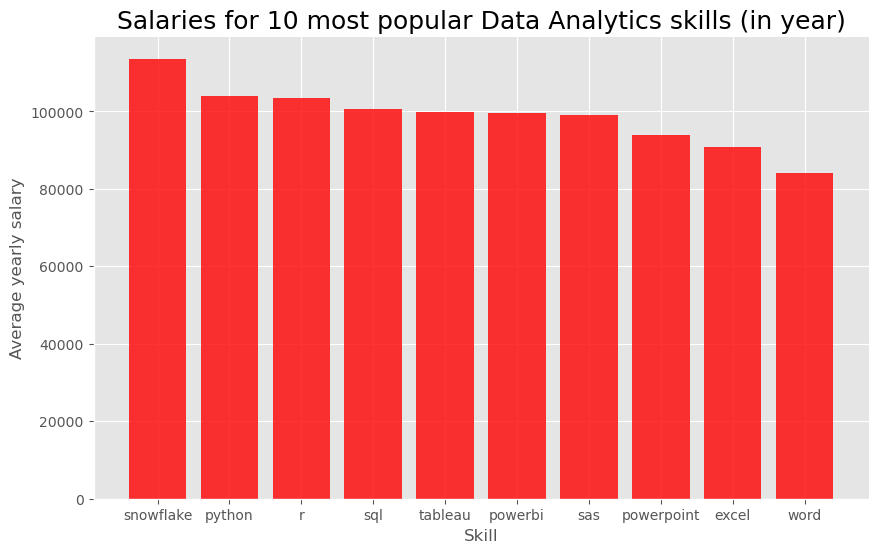

In [41]:
plt.style.use('ggplot')

# Dane wejściowe
x = top_skills_df['skill']
y = top_skills_df['avg_salary']
colors = top_skills_df['avg_salary']

# Tworzenie wykresu z zielonymi słupkami
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y, color='red', alpha=0.8)

# Konfiguracja osi i tytułu wykresu
ax.set_title("Salaries for 10 most popular Data Analytics skills (in year)", fontsize=18)
ax.set_xlabel("Skill")
ax.set_ylabel("Average yearly salary")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Dodanie informacji wskazywanej przez wskaźnik myszy (hover)
def hover(event):
    vis = ax.contains(event)[0]
    if vis:
        index = np.where(x == event.artist.get_x())[0][0]
        ax.set_title(f"Skill: {x[index]}\nAverage yearly salary: {y[index]:.2f}")
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', hover)
plt.show()